In [22]:
#code to assess if calling amplitude changes over time after glycine injection

#initialize packages and plugins
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import os
from os import path

%matplotlib inline

In [23]:
#import data for time as array with numpy
time=np.loadtxt('time.txt', dtype=bytes)
time

array([b'base', b'base', b'base', b'base', b'base', b'base', b'0', b'0',
       b'0', b'0', b'0', b'0', b'1', b'1', b'1', b'1', b'1', b'1', b'2.5',
       b'2.5', b'2.5', b'2.5', b'2.5', b'2.5', b'5', b'5', b'5', b'5',
       b'5', b'5', b'10', b'10', b'10', b'10', b'10', b'10', b'15', b'15',
       b'15', b'15', b'15', b'15', b'20', b'20', b'20', b'20', b'20',
       b'20', b'25', b'25', b'25', b'25', b'25', b'25', b'30', b'30',
       b'30', b'30', b'30', b'30'], 
      dtype='|S4')

In [24]:
#import data for amplitude as array with numpy
amplitude=np.loadtxt('amplitude2.txt')
amplitude

array([  0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,  -3.88608876, -14.55243464,
        -4.98277767,  -6.62039196,   3.09806235, -15.18133508,
        -1.42800564, -15.60650029,  -7.78449406,  -2.82590256,
        -1.32100263, -17.37893958,   0.07761332, -14.55168964,
        -6.75586225,   2.51000562,  -2.17691366,  -8.60072789,
         1.95340367, -13.53863451,  -8.84423034,   3.96542382,
        -6.23251282,  -7.34454884,   6.64867492, -16.98908449,
       -19.0631512 ,  -1.70355673,  -5.28425536,  -1.47687316,
         3.99945059, -15.74780756, -21.35900458,  -1.23775663,
        -6.4351596 ,   0.93408061,   2.90201638, -12.77106919,
       -23.11893643,   1.98065993,  -6.64419035,  -9.43039219,
         5.36347946, -12.95537847, -20.37661711,   0.82130958,
        -7.1122502 ,  -3.65874557,   6.389116  ,  -9.23450492,
       -27.33582106,  -0.59736889,  -8.23341932,  -9.69117145])

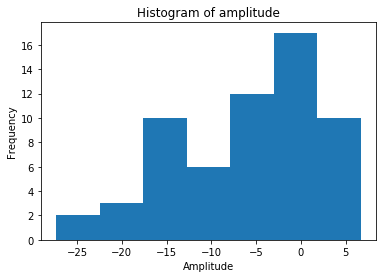

In [25]:
#create histogramm of amplitude to check for normality distribution
f, ax=plt.subplots()
ax.hist(amplitude, bins='auto')
ax.set_title('Histogram of amplitude')
ax.set_xlabel('Amplitude')
ax.set_ylabel('Frequency')
a=()

In [26]:
#do Shapiro Wilk normailty test
shapiro=stats.shapiro(amplitude)
W=0.95
p=0.02
'Result of Shapiro Wilk test: {}, {}'.format(W, p)

'Result of Shapiro Wilk test: 0.95, 0.02'

In [27]:
'Histogram did not look normally distributed and Shapiro Wilk test rejected normality. Proceed with non-parametric statistic.'.format()

'Histogram did not look normally distributed and Shapiro Wilk test rejected normality. Proceed with non-parametric statistic.'

In [28]:
#import dataframe with pandas for non-parametric statistic
dataColumns=['-1', '0','1','2.5','5','10','15','20','25','30']
glycine=pd.read_csv('Glycine.csv', delim_whitespace = True)
glycine.columns = dataColumns
glycine

,-1,0,1,2.5,5,10,15,20,25,30
0,0,-14.552435,-15.606500,-14.551690,-13.538635,-16.989084,-15.747808,-12.771069,-12.955378,-9.234505
1,0,-4.982778,-7.784494,-6.755862,-8.844230,-19.063151,-21.359005,-23.118936,-20.376617,-27.335821
2,0,-6.620392,-2.825903,2.510006,3.965424,-1.703557,-1.237757,1.980660,0.821310,-0.597369
3,0,3.098062,-1.321003,-2.176914,-6.232513,-5.284255,-6.435160,-6.644190,-7.112250,-8.233419
4,0,-15.181335,-17.378940,-8.600728,-7.344549,-1.476873,0.934081,-9.430392,-3.658746,-9.691171


In [30]:
#do Kruskal Wallis test to check for significant differences
glycine_col_values=list(map(lambda c: glycine[c], glycine.columns))
W=8.65
p=0.47
'Result of Kruskal Wallis test: {}, {}'.format(W, p)

'Result of Kruskal Wallis test: 8.65, 0.47'

In [31]:
#calculate median for each column of glycine
medians = [] #create empty list to store median in
for x in glycine_col_values:
    medians.append(x.median())
medians

[0.0,
 -6.620391957000001,
 -7.784494057000001,
 -6.7558622470000005,
 -7.3445488370000005,
 -5.284255358,
 -6.4351596010000005,
 -9.430392191000001,
 -7.112250200000001,
 -9.234504918999999]

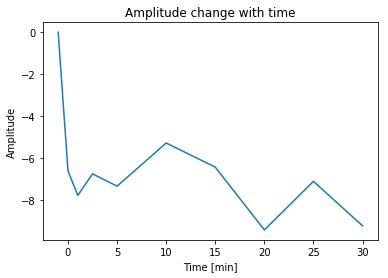

In [32]:
#plot amplitude against time
fig=plt.plot(dataColumns, medians)
plt.title('Amplitude change with time')
plt.xlabel('Time [min]')
plt.ylabel('Amplitude')